Introduction 

COVID-19 Analysis
The dataset used in this notebook (Covid-19_dataset.csv) is same as the COVID19_line_list_data.csv dataset taken from https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset, but the only difference is that in our dataset death and recovered features are encoded as (0 or 1) and not in form of dates as in the later dataset.



There are three parts to my report as follows:

-Cleaning -Visualization -Prediction

Purpose The first purpose of choosing this work is to find out which factors are more important in the death and recovery of patients.

The second purpose is implementing several machine learning algorithms to predict the death and recovery of patients and compare the result to discover which algorithm works better for this specific dataset.

**1-Importing Libraries**


In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**2-Get Data**

In [45]:
df=pd.read_csv('datasets_665630_1173063_Covid-19_dataset.csv')

In [46]:
df.head(2)

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,765,15.0,02-10-20,new confirmed COVID-19 patient in Vietnam: 3 m...,Vinh Phuc,Vietnam,NaN,0.25,NaN,NaN,NaN,NaN,NaN,0,0,0,1,NaN,Vietnam News,https://vietnamnews.vn/society/591803/viet-nam...
1,477,27.0,02-05-20,new confirmed COVID-19 patient in Singapore: m...,Singapore,Singapore,male,0.50,NaN,NaN,NaN,1/23/2020,02-03-20,0,0,0,1,NaN,Straits Times,https://www.straitstimes.com/singapore/health/...


**3-Data Cleaning**

*3-1-Renaming some of the columns*

In [47]:
df.columns=df.columns.str.lower().str.replace(' ','_')

In [48]:
df.head(2)

,id,case_in_country,reporting_date,summary,location,country,gender,age,symptom_onset,if_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting_wuhan,from_wuhan,death,recovered,symptom,source,link
0,765,15.0,02-10-20,new confirmed COVID-19 patient in Vietnam: 3 m...,Vinh Phuc,Vietnam,NaN,0.25,NaN,NaN,NaN,NaN,NaN,0,0,0,1,NaN,Vietnam News,https://vietnamnews.vn/society/591803/viet-nam...
1,477,27.0,02-05-20,new confirmed COVID-19 patient in Singapore: m...,Singapore,Singapore,male,0.50,NaN,NaN,NaN,1/23/2020,02-03-20,0,0,0,1,NaN,Straits Times,https://www.straitstimes.com/singapore/health/...


*3-2-Removing unnecessary columns*

In [49]:
df.drop(['id','case_in_country','summary','symptom_onset', 'if_onset_approximated', 'hosp_visit_date', 'exposure_start',
'exposure_end', 'symptom', 'source', 'link'],axis=1,inplace=True)

In [50]:
df.head()

,reporting_date,location,country,gender,age,visiting_wuhan,from_wuhan,death,recovered
0,02-10-20,Vinh Phuc,Vietnam,NaN,0.25,0,0,0,1
1,02-05-20,Singapore,Singapore,male,0.50,0,0,0,1
2,2/17/2020,Singapore,Singapore,male,1.00,0,0,0,1
3,1/25/2020,"Hechi, Guangxi",China,female,2.00,1,0,0,0
4,1/25/2020,Johor,Malaysia,male,2.00,0,0,0,1


In [51]:
df.columns

Index(['reporting_date', 'location', 'country', 'gender', 'age',
       'visiting_wuhan', 'from_wuhan', 'death', 'recovered'],
      dtype='object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 9 columns):
reporting_date    1084 non-null object
location          1085 non-null object
country           1085 non-null object
gender            902 non-null object
age               843 non-null float64
visiting_wuhan    1085 non-null int64
from_wuhan        1085 non-null int64
death             1085 non-null int64
recovered         1085 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 76.4+ KB


In [53]:
df.describe()

,age,visiting_wuhan,from_wuhan,death,recovered
count,843.000000,1085.000000,1085.000000,1085.000000,1085.000000
mean,49.483689,0.176959,0.147465,0.058065,0.146544
std,18.255334,0.381810,0.354733,0.233973,0.353814
min,0.250000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,0.000000,0.000000,0.000000,0.000000
max,96.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
print('Number of Null values in Columns:')
print('\n')
df.isnull().sum()

Number of Null values in Columns:




reporting_date      1
location            0
country             0
gender            183
age               242
visiting_wuhan      0
from_wuhan          0
death               0
recovered           0
dtype: int64

*3-3-Deleting Rows with Null Values in Specific columns*

In [55]:
df.dropna(inplace=True)

In [56]:
df.isnull().sum()

reporting_date    0
location          0
country           0
gender            0
age               0
visiting_wuhan    0
from_wuhan        0
death             0
recovered         0
dtype: int64

In [57]:
df.head()

,reporting_date,location,country,gender,age,visiting_wuhan,from_wuhan,death,recovered
1,02-05-20,Singapore,Singapore,male,0.5,0,0,0,1
2,2/17/2020,Singapore,Singapore,male,1.0,0,0,0,1
3,1/25/2020,"Hechi, Guangxi",China,female,2.0,1,0,0,0
4,1/25/2020,Johor,Malaysia,male,2.0,0,0,0,1
5,02-10-20,Singapore,Singapore,female,2.0,1,0,0,1


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 1 to 1079
Data columns (total 9 columns):
reporting_date    825 non-null object
location          825 non-null object
country           825 non-null object
gender            825 non-null object
age               825 non-null float64
visiting_wuhan    825 non-null int64
from_wuhan        825 non-null int64
death             825 non-null int64
recovered         825 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 64.5+ KB


In [59]:
df.describe()

,age,visiting_wuhan,from_wuhan,death,recovered
count,825.000000,825.000000,825.000000,825.000000,825.000000
mean,49.755758,0.179394,0.186667,0.070303,0.173333
std,17.991875,0.383915,0.389880,0.255812,0.378765
min,0.500000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,0.000000,0.000000,0.000000,0.000000
max,96.000000,1.000000,1.000000,1.000000,1.000000


**4-Visualization**

4-1-We want to find the Number of Patients Died based on their age

(0, 100)

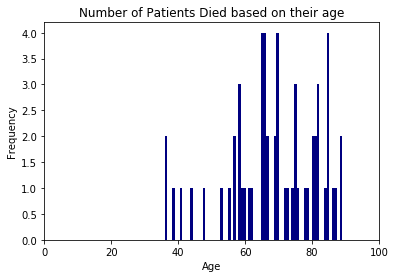

In [60]:
df[df['death']==1]['age'].plot(kind='hist',bins=70,colormap='jet')
plt.title('Number of Patients Died based on their age')
plt.xlabel('Age')
plt.xlim(0,100)

We can conclude that Pateints with age more than 55 have high chance of death because of their weaker immune system.

4-2-We want to find the Number of Patients Recovered based on their age

Text(0.5, 0, 'Age')

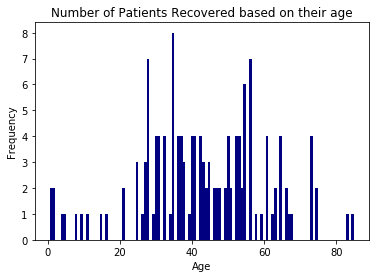

In [61]:
df[df['recovered']==1]['age'].plot(kind='hist',bins=110,colormap='jet')
plt.title('Number of Patients Recovered based on their age')
plt.xlabel('Age')

Patients with age below 55 have high chance of recovery.

4-3-Finding Current count of patients, Recovered, Dead, Number of Patients receiving treatment

In [62]:
print('Current count of patients:',df['death'].count())

Current count of patients: 825


In [63]:
print('Number of Dead Patients:', df[df['death']==1]['death'].count())

Number of Dead Patients: 58


In [64]:
print('Number of Recovered Patients:',df[df['recovered']==1]['death'].count())

Number of Recovered Patients: 143


In [65]:
print('Number of  Patients Receiving Treatment:',df[(df['death']==0)&(df['recovered']==0)]['death'].count())

Number of  Patients Receiving Treatment: 624


4-4-Bar plot of Recovered and Dead Patients 

In [66]:
df[df['recovered']==1]['recovered'].count()

143

In [67]:
df[df['death']==1]['death'].count()

58

Text(0.5, 0, 'Patients')

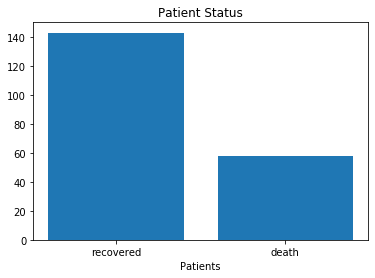

In [68]:
plt.bar(x=['recovered','death'],height=[143,58])
plt.title('Patient Status')
plt.xlabel("Patients")

4-5-Bar plot of Number of Male and Female Patients Died

In [69]:
df[df['death']==1]['gender'].value_counts()

male      44
female    14
Name: gender, dtype: int64

Text(0.5, 1.0, 'Number of Patients Died')

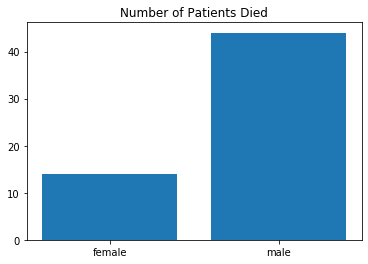

In [70]:
plt.bar(x=['female','male'],height=[14,44])
plt.title("Number of Patients Died")

most of dead patients were male

4-6-Bar plot of Number of Male and Female Patients Recovered

In [71]:
df[df['recovered']==1]['gender'].value_counts()

male      79
female    64
Name: gender, dtype: int64

Text(0.5, 1.0, 'Number of Patients Recovered')

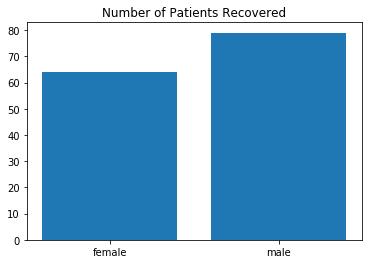

In [72]:
plt.bar(x=['female','male'],height=[64,79])
plt.title("Number of Patients Recovered")

most of recovered patients were male

4-7-Bar plot of Number of from wuhan and not from wuhan Patients Died

In [73]:
df[df['death']==1]['from_wuhan'].value_counts()

1    34
0    24
Name: from_wuhan, dtype: int64

Text(0.5, 1.0, 'Number of Patients Died')

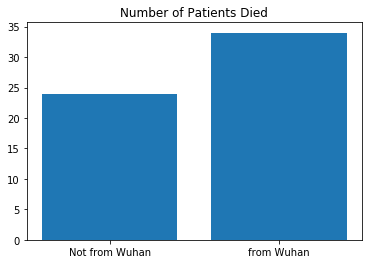

In [74]:
plt.bar(x=['Not from Wuhan','from Wuhan'], height=[24,34])
plt.title('Number of Patients Died')

patients from Wuhan have high chance of death as compared to patients not from Wuhan

4-8-Bar plot of Number of from wuhan and not from wuhan Patients Recovered

In [75]:
df[df['recovered']==1]['from_wuhan'].value_counts()

0    114
1     29
Name: from_wuhan, dtype: int64

Text(0.5, 1.0, 'Number of Patients Recovered')

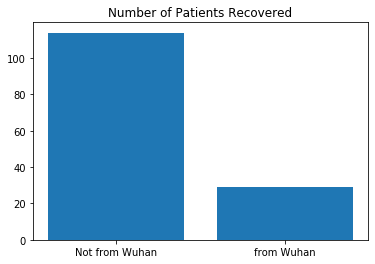

In [76]:
plt.bar(x=['Not from Wuhan','from Wuhan'], height=[114,29])
plt.title('Number of Patients Recovered')

patients from Wuhan have low chance of recovery as compared to patients not from Wuhan

4-9-Countplot of Number of Covid Patients in different Countries

Text(0.5, 0, 'Country')

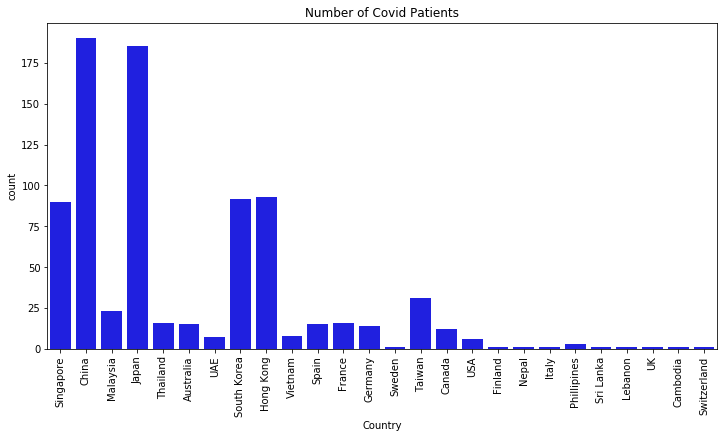

In [77]:
plt.figure(figsize=(12,6))
sns.countplot(x='country',data=df,color='blue')
plt.xticks(rotation=90)
plt.title('Number of Covid Patients')
plt.xlabel('Country')

China and Japan have more patients as compared to others.

4-10-WORLD MAP SHOWING Number of Death Patients in Each Country

In [78]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode (connected=True)

In [79]:
groupby_df1=df.groupby('country').sum()

In [80]:
groupby_df1.index

Index(['Australia', 'Cambodia', 'Canada', 'China', 'Finland', 'France',
       'Germany', 'Hong Kong', 'Italy', 'Japan', 'Lebanon', 'Malaysia',
       'Nepal', 'Phillipines', 'Singapore', 'South Korea', 'Spain',
       'Sri Lanka', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'UAE', 'UK',
       'USA', 'Vietnam'],
      dtype='object', name='country')

In [83]:
data=dict (type='choropleth', locations=groupby_df1.index, locationmode='country names', colorscale='viridis', reversescale=True, text= groupby_df1.index,z=groupby_df1['death'], colorbar={'title':'Number of Death Patients'})

In [87]:
layout=dict(title='Number of Death Patients in Each Country', geo=dict(showframe=False, projection={'type':'mercator'}))

In [88]:
choromap=go.Figure(data=[data], layout=layout)

In [89]:
iplot(choromap)

6-11-Worl Map Showing Number of Recovered Patients in Each Country

In [90]:
data=dict (type='choropleth', locations=groupby_df1.index, locationmode='country names', colorscale='viridis', reversescale=True, text= groupby_df1.index,z=groupby_df1['recovered'], colorbar={'title':'Number of Recovered Patients'})

In [91]:
layout=dict(title='Number of Recovered Patients in Each Country', geo=dict(showframe=False, projection={'type':'mercator'}))

In [92]:
choromap=go.Figure(data=[data], layout=layout)

In [93]:
iplot(choromap)

**5-Prediction**

Predicting DEATH of a Patient

5-1-Encoding Data

5-1-1-location

In [94]:
from sklearn.preprocessing import LabelEncoder

In [95]:
model1=LabelEncoder()
model1.fit(df['location'])
new1=model1.transform(df['location'])
df['location']=new1

5-1-2-country

In [96]:
model2=LabelEncoder()
model2.fit(df['country'])
LabelEncoder()
new2=model2.transform(df['country'])
df['country']=new2

5-1-3-gender

In [97]:
model3=LabelEncoder()
model3.fit(df['gender'])
new3=model3.transform(df['gender'])
df['gender']=new3
df.head()

,reporting_date,location,country,gender,age,visiting_wuhan,from_wuhan,death,recovered
1,02-05-20,88,14,1,0.5,0,0,0,1
2,2/17/2020,88,14,1,1.0,0,0,0,1
3,1/25/2020,25,3,0,2.0,1,0,0,0
4,1/25/2020,41,11,1,2.0,0,0,0,1
5,02-10-20,88,14,0,2.0,1,0,0,1


5-2-Predicting Death of a Patient by Logistic Regression

In [98]:
y=df['death']
X=df[['location','country','gender','age','visiting_wuhan','from_wuhan']]

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
model4=LogisticRegression()

In [103]:
model4.fit(X,y)

C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
predictions1=model4.predict(X_test)

In [105]:
from sklearn.metrics import classification_report, confusion_matrix

In [106]:
print(confusion_matrix(y_test,predictions1))
print("\n")
print(classification_report(y_test,predictions1))

[[159   1]
 [  3   2]]


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       160
           1       0.67      0.40      0.50         5

    accuracy                           0.98       165
   macro avg       0.82      0.70      0.74       165
weighted avg       0.97      0.98      0.97       165



We can see that LogisticRegression with the accuracy of 98% is a good model for predicting the number of dead patients.

5-3-Predicting Recovery of a Patient by Logistic Regression

5-3-1-Logistic Regression

In [107]:
X=df[['location','country','gender','age','visiting_wuhan','from_wuhan']]
y=df['recovered']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [109]:
model5=LogisticRegression()

In [110]:
model5.fit(X_train,y_train)

C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
predictions2=model5.predict(X_test)

In [112]:
print(confusion_matrix(y_test,predictions2))
print("\n")
print(classification_report(y_test,predictions2))

[[126   2]
 [ 34   3]]


              precision    recall  f1-score   support

           0       0.79      0.98      0.87       128
           1       0.60      0.08      0.14        37

    accuracy                           0.78       165
   macro avg       0.69      0.53      0.51       165
weighted avg       0.75      0.78      0.71       165



5-3-2-DecisionTreeClassifier

In [113]:
X=df[['location','country','gender','age','visiting_wuhan','from_wuhan']]
y=df['recovered']

In [114]:
from sklearn.tree import DecisionTreeClassifier
model6=DecisionTreeClassifier()
model6.fit(X_train,y_train)
predictions3=model6.predict(X_test)

In [115]:
print(confusion_matrix(y_test,predictions3))
print("\n")
print(classification_report(y_test,predictions3))

[[121   7]
 [ 21  16]]


              precision    recall  f1-score   support

           0       0.85      0.95      0.90       128
           1       0.70      0.43      0.53        37

    accuracy                           0.83       165
   macro avg       0.77      0.69      0.71       165
weighted avg       0.82      0.83      0.81       165



5-3-3-RandomForestClassifier

In [125]:
from sklearn.ensemble import RandomForestClassifier
model7=RandomForestClassifier(n_estimators=200)
model7.fit(X_train,y_train)
predictions4=model7.predict(X_test)

In [126]:
print(confusion_matrix(y_test,predictions4))
print("\n")
print(classification_report(y_test,predictions4))

[[121   7]
 [ 11  26]]


              precision    recall  f1-score   support

           0       0.92      0.95      0.93       128
           1       0.79      0.70      0.74        37

    accuracy                           0.89       165
   macro avg       0.85      0.82      0.84       165
weighted avg       0.89      0.89      0.89       165



5-3-4-SupportVectorClassifier

In [118]:
from sklearn.svm import SVC
model8=SVC()
model8.fit(X_train,y_train)

C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [119]:
predictions5=model8.predict(X_test)

In [120]:
print(confusion_matrix(y_test,predictions5))
print("\n")
print(classification_report(y_test,predictions5))

[[124   4]
 [ 30   7]]


              precision    recall  f1-score   support

           0       0.81      0.97      0.88       128
           1       0.64      0.19      0.29        37

    accuracy                           0.79       165
   macro avg       0.72      0.58      0.59       165
weighted avg       0.77      0.79      0.75       165



In [121]:
param_grid={'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001], 'kernel':['rbf']}

In [122]:
from sklearn.model_selection import GridSearchCV
model9=GridSearchCV(SVC(),param_grid, verbose=3)
model9.fit(X_train,y_train)


C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.837, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.841, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.840, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.837, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.841, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.840, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.845, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.845, total=   0.1s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.2s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [123]:
predictions6=model9.predict(X_test)

In [124]:
print(confusion_matrix(y_test,predictions6))
print("\n")
print(classification_report(y_test,predictions6))

[[120   8]
 [ 22  15]]


              precision    recall  f1-score   support

           0       0.85      0.94      0.89       128
           1       0.65      0.41      0.50        37

    accuracy                           0.82       165
   macro avg       0.75      0.67      0.69       165
weighted avg       0.80      0.82      0.80       165



So we conclude that RandomForestClassifier with the accuracy of 89% is the best model for predicting the number of recovered patients.